# Feautre Engineering for the Dataset

### Imports

In [1]:
# add imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import warnings 
warnings.filterwarnings('ignore')

### Load in data:

In [10]:
test_transactions = pd.read_csv(r'datasets/test_transaction.csv')
test_identity = pd.read_csv(r'datasets/test_identity.csv')
train_transactions = pd.read_csv(r'datasets/train_transaction.csv')
train_identity = pd.read_csv(r'datasets/train_identity.csv')

# merge train and test datasets independently on 'TransactionID'
train_data = train_transactions.merge(train_identity, on='TransactionID', how='left')
test_data = test_transactions.merge(test_identity, on='TransactionID', how='left')

# delete unused objects to save memory
del test_transactions, train_transactions, train_identity, test_identity


### Basic Visualization

In [3]:
print("Train Data Overview:")
display(train_data.head(10))

Train Data Overview:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Imputation for null values handling:

In [4]:
train_data.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 434 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         590540 non-null  int64  
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           581607 non-null  float64
 7    card3           588975 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           586281 non-null  float64
 10   card6           588969 non-null  object 
 11   addr1           524834 non-null  float64
 12   addr2           524834 non-null  float64
 13   dist1           238269 non-null  float64
 14   dist2           37627 non-null   float64
 15   P_emaildomain   496084 non-null  object 
 16   R_emaildomain   137291 non-null  obj

There are a significant amount of null values in the table, lets get the quantative ones with an average

In [7]:
def fill_with_just_means():    
    for column in train_data.columns:
        if train_data[column].dtype in ['int64','float64']:
            mean_value = train_data[column].mean() 
            train_data[column].fillna(mean_value, inplace=True)  

    train_data.info(verbose=True, memory_usage=True, show_counts=True)
    return train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 434 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         590540 non-null  int64  
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           590540 non-null  float64
 7    card3           590540 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           590540 non-null  float64
 10   card6           588969 non-null  object 
 11   addr1           590540 non-null  float64
 12   addr2           590540 non-null  float64
 13   dist1           590540 non-null  float64
 14   dist2           590540 non-null  float64
 15   P_emaildomain   496084 non-null  object 
 16   R_emaildomain   137291 non-null  obj

#### Try with a range

In [ ]:
def standard_deviation_range():
    import random

    for column in train_data.columns:
        if train_data[column].dtype in ['int64','float64']:
            mean = train_data[column].mean()
            stdev = train_data[column].std(ddof=0)
            mean_range = [(mean - stdev), (mean + stdev)]
            train_data[column].fillna(random.uniform(mean_range[0], mean_range[1]), inplace=True)  

    train_data.info(verbose=True, memory_usage=True, show_counts=True)
    train_data.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 434 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         590540 non-null  int64  
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           590540 non-null  float64
 7    card3           590540 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           590540 non-null  float64
 10   card6           588969 non-null  object 
 11   addr1           590540 non-null  float64
 12   addr2           590540 non-null  float64
 13   dist1           590540 non-null  float64
 14   dist2           590540 non-null  float64
 15   P_emaildomain   496084 non-null  object 
 16   R_emaildomain   137291 non-null  obj

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,362.555488,150.0,discover,142.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.000000,150.0,mastercard,102.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.000000,150.0,visa,166.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.000000,150.0,mastercard,117.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.000000,150.0,mastercard,102.0,...,samsung browser 6.2,32.000000,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2987095,0,88120,59.0,W,2538,476.000000,150.0,visa,166.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2987096,0,88131,108.5,W,15121,555.000000,150.0,visa,226.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2987097,0,88147,21.5,W,2581,199.000000,150.0,mastercard,202.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2987098,0,88149,159.0,W,6459,100.000000,150.0,mastercard,224.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Neither of these worked well for null values, Use a regression model:

In [19]:
# this will take 1-2 hours

def linear_regression_fill():
    import lightgbm as lgb
    from sklearn.impute import SimpleImputer

    numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns

    for feature_to_impute in numerical_features:
        print(f'Imputing missing values for: {feature_to_impute}')
        
        # Separate predictors and target
        other_features = numerical_features[numerical_features != feature_to_impute]
        
        # Split into rows with and without missing values for the target feature
        train_data_no_missing = train_data[~train_data[feature_to_impute].isnull()]
        train_data_missing = train_data[train_data[feature_to_impute].isnull()]
        
        if train_data_missing.empty:
            print(f'No missing values for {feature_to_impute}. Skipping.')
            continue

        X_train = train_data_no_missing[other_features]
        y_train = train_data_no_missing[feature_to_impute]
        X_missing = train_data_missing[other_features]
        
        # Handle missing values in predictors
        imputer = SimpleImputer(strategy='mean')
        X_train = imputer.fit_transform(X_train)
        X_missing = imputer.transform(X_missing)
        
        # configure lightgbm
        regressor = lgb.LGBMRegressor(
            device='gpu', 
            n_estimators=50,  
            random_state=42,
            learning_rate=0.1,
            max_depth=-1
        )
        regressor.fit(X_train, y_train)
        
        # predict missing vals
        predicted_values = regressor.predict(X_missing)
        
        # fill missing vals
        train_data.loc[train_data[feature_to_impute].isnull(), feature_to_impute] = predicted_values
        print(f"Missing values in {feature_to_impute} have been filled.")
linear_regression_fill()

Imputing missing values for: TransactionID
No missing values for TransactionID. Skipping.
Imputing missing values for: isFraud
No missing values for isFraud. Skipping.
Imputing missing values for: TransactionDT
No missing values for TransactionDT. Skipping.
Imputing missing values for: TransactionAmt
No missing values for TransactionAmt. Skipping.
Imputing missing values for: card1
No missing values for card1. Skipping.
Imputing missing values for: card2
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 37782
[LightGBM] [Info] Number of data points in the train set: 581607, number of used features: 402
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 68 dense feature groups (37.72 MB) transferred to GPU in 0.046409 secs. 1 sparse feature groups

In [20]:
# Save to a CSV file
output_file = "imputed_data.csv"
train_data.to_csv(output_file, index=False)
print(f"Data saved to {output_file}.")

Data saved to imputed_data.csv.


## --------------------------------------------------------

## Heatmap making

In [23]:
def make_heatmap(impotant_data2, impotant_data3):    
    
    data2 = impotant_data2
    data3 = impotant_data3

    plt.style.use('dark_background')

    # Style stuff
    colors = ["white", "purple"]
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    more_than_o2_size = {'size':8}
    more_than_o3_size = {'size':12}

    # Now we can plot both heat maps
    plt.figure(figsize=(10, 8))
    sns.heatmap(data2.corr(), annot=True, cmap=custom_cmap, fmt=".2f", annot_kws=more_than_o2_size)
    plt.title("Heatmap of Important Features Correlated > 0.2 with isFraud", color='white')
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(data3.corr(), annot=True, cmap=custom_cmap, fmt=".2f", annot_kws=more_than_o3_size)
    plt.title("Heatmap of Important Features Correlated > 0.3 with isFraud", color='white')
    plt.show()

In [24]:
def heatmap_on_data(data):
    numeric_data = data.select_dtypes(include=['number'])
    # compute the correlations of all quantitative data with 'isFruad'
    correlation_matrix = numeric_data.corr()

    # only take the important columns that have correlation coefficients above 0.1 or below -0.1
    important_columns2 = correlation_matrix['isFraud'][abs(correlation_matrix['isFraud']) > 0.2].index
    important_columns3 = correlation_matrix['isFraud'][abs(correlation_matrix['isFraud']) > 0.3].index

    important_data2 = numeric_data[important_columns2]
    important_data3 = numeric_data[important_columns3]
    make_heatmap(important_data2, important_data3)

#### Run with regression data:

Data read, making heatmap


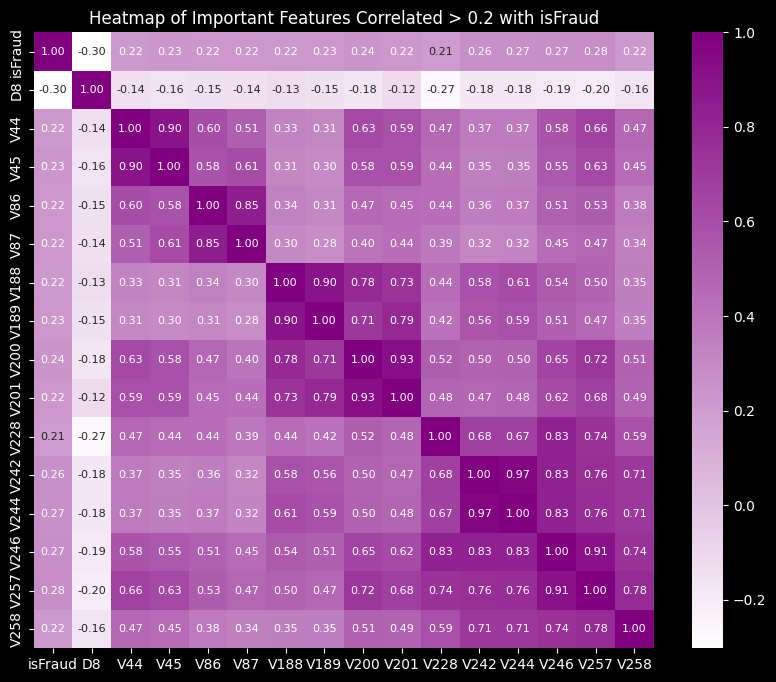

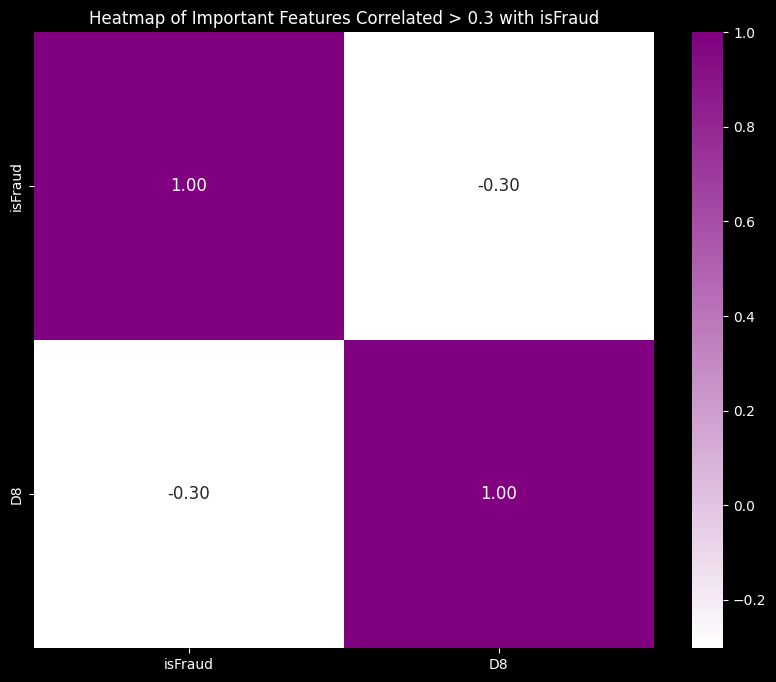

In [25]:
regression_data = pd.read_csv(r'datasets\imputed_data.csv')
print('Data read, making heatmap')
heatmap_on_data(regression_data)

#### Run with the 'just take the average data' (not tested)

In [ ]:
heatmap_on_data(fill_with_just_means())

#### Run with no imputation

In [ ]:
heatmap_on_data(train_data)